[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_02/blob/master/Th02_AS--Solution_of_Data_Visualization_Assignment_Master.ipynb)

# Data Visualization

Very little machine learning or data science takes place without visualizations. Visualizations help us comprehend our data, segment it, and eventually transform it in a way that allows ML algorithms to produce insights.

The fundamental visualizations are:

* [line charts](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)
* [scatter plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
* [bar charts](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html)

Visualizations are useful in

* 2 dimensions
* [3 dimensions](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
* [images](https://matplotlib.org/users/image_tutorial.html)

Visualizations are highlighted by

* [color](https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html)
* [axis size and spacing](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html)
* [legends](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html)
* [annotations](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
* [subplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

In this assignment, you will use visualizations to explore the titanic and okcupid datasets, looking for linear, polynomial, or gaussian-like relationships. Every other relationship looks like noise.

## Assignment

The following dataset contains a number of hidden functions. Use bar plots, scatter plots, and line plots to explore the dataset, looking for relationships. When you discover a relationship, you will know it.

It is possible to create a 2d graph for every pair of columns, and a 3d graph for every triple of columns. This would produce `10 choose 2` 2d graphs and `10 choose 3` 3d graphs. See if you can find the functions in this dataset through visualization. Make as many visualizations as you like.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)
print(data.columns)
print(data.head(5))
print(data.shape)

Index(['arrow', 'under', 'interior', 'theta', 'amb', 'slice', 'delta', 'pi',
       'height', 'nu', 'night', 'dataset', 'length', 'twi', 'x', 'wind', 'y',
       'rho', 'alpha'],
      dtype='object')
         arrow     under      interior         theta         amb  \
0  5718.086525 -1.614321  1.555158e+11  11213.081938   95.426020   
1  3230.167947  0.066989  1.853956e+12  21130.628512   12.420615   
2  7557.771756 -0.067705  8.501664e+10  13804.152665  152.939420   
3  6555.190363 -1.253076  1.194396e+12   7549.844014  457.351838   
4  3201.371780  0.327282  5.787566e+11  32745.773149  228.577117   

          slice       delta            pi        height            nu  \
0   7425.427256  -10.406357   9680.358706  7.120126e+06  1.546267e+07   
1  12649.208494 -115.874083   8052.298378  2.075786e+07  4.522003e+06   
2   9134.779756  -30.421137   1246.712864  1.078952e+07  6.069516e+06   
3   2475.142419 -129.555563   5177.525187  7.995510e+05  2.238686e+07   
4   1545.254659 -101.9585

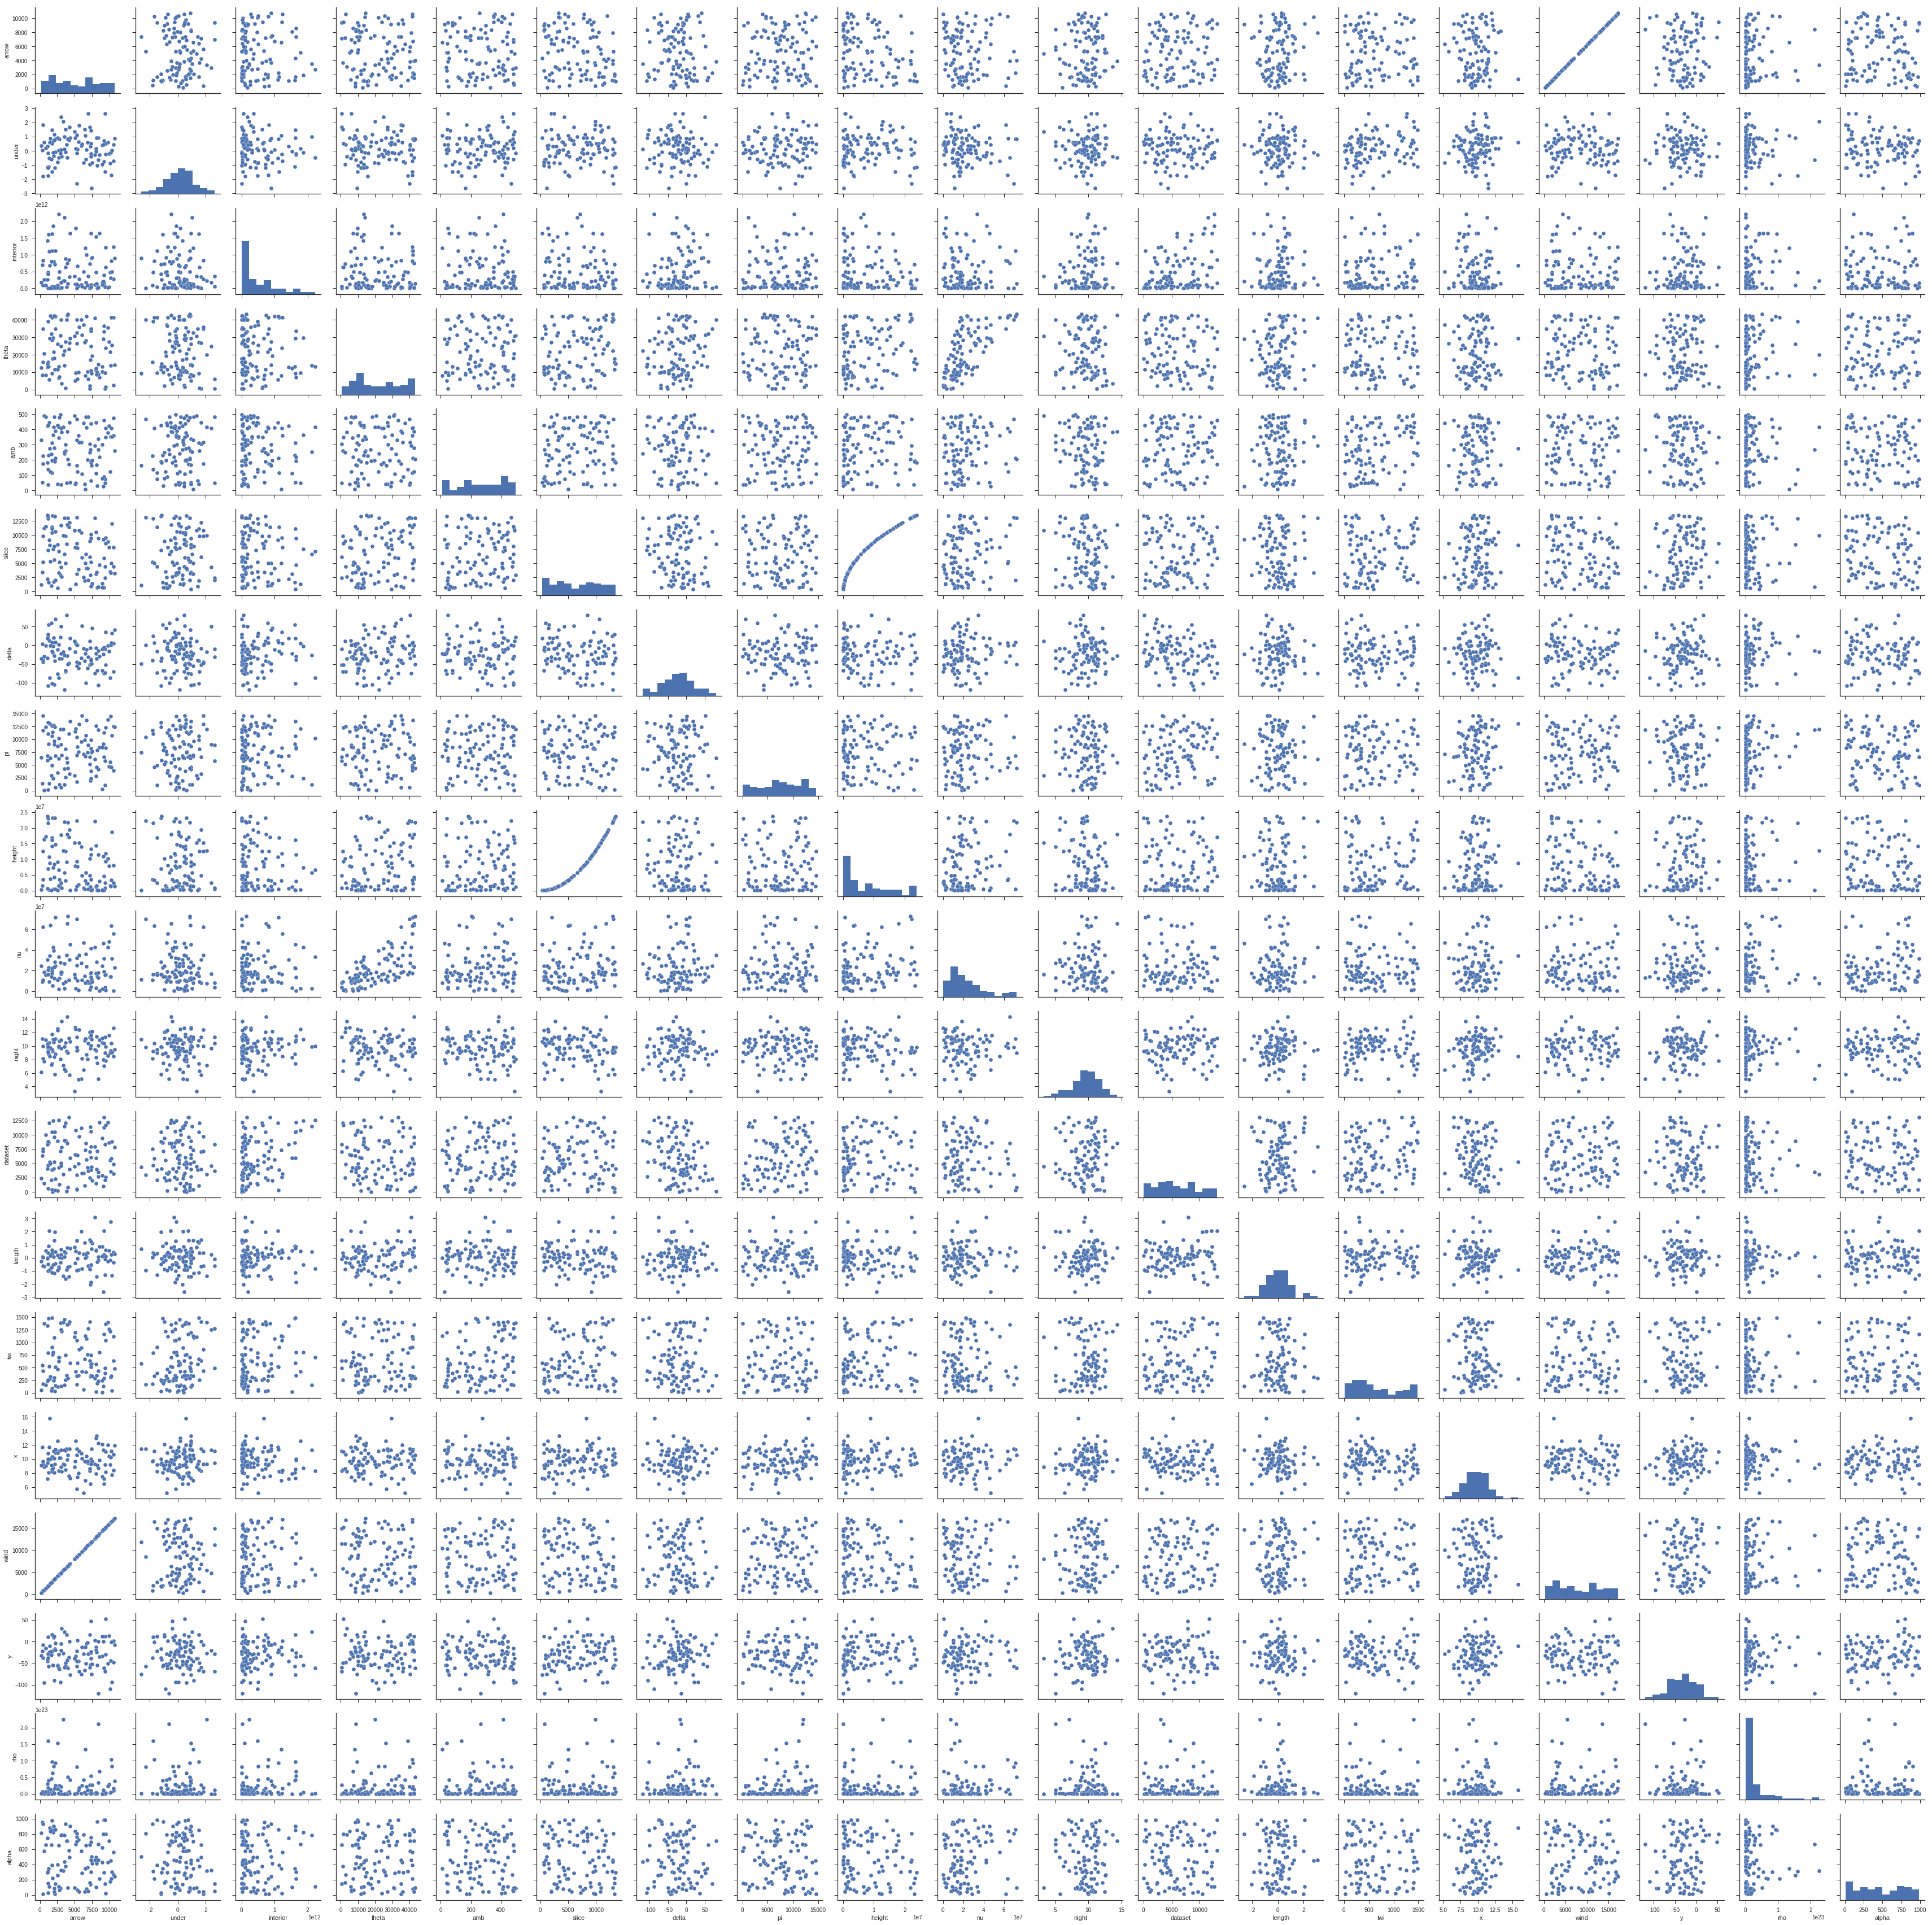

In [2]:
# plot the data until you intuit information from it
import seaborn
seaborn.set(style='ticks',color_codes=True)
seaborn.pairplot(data.sample(n=100))

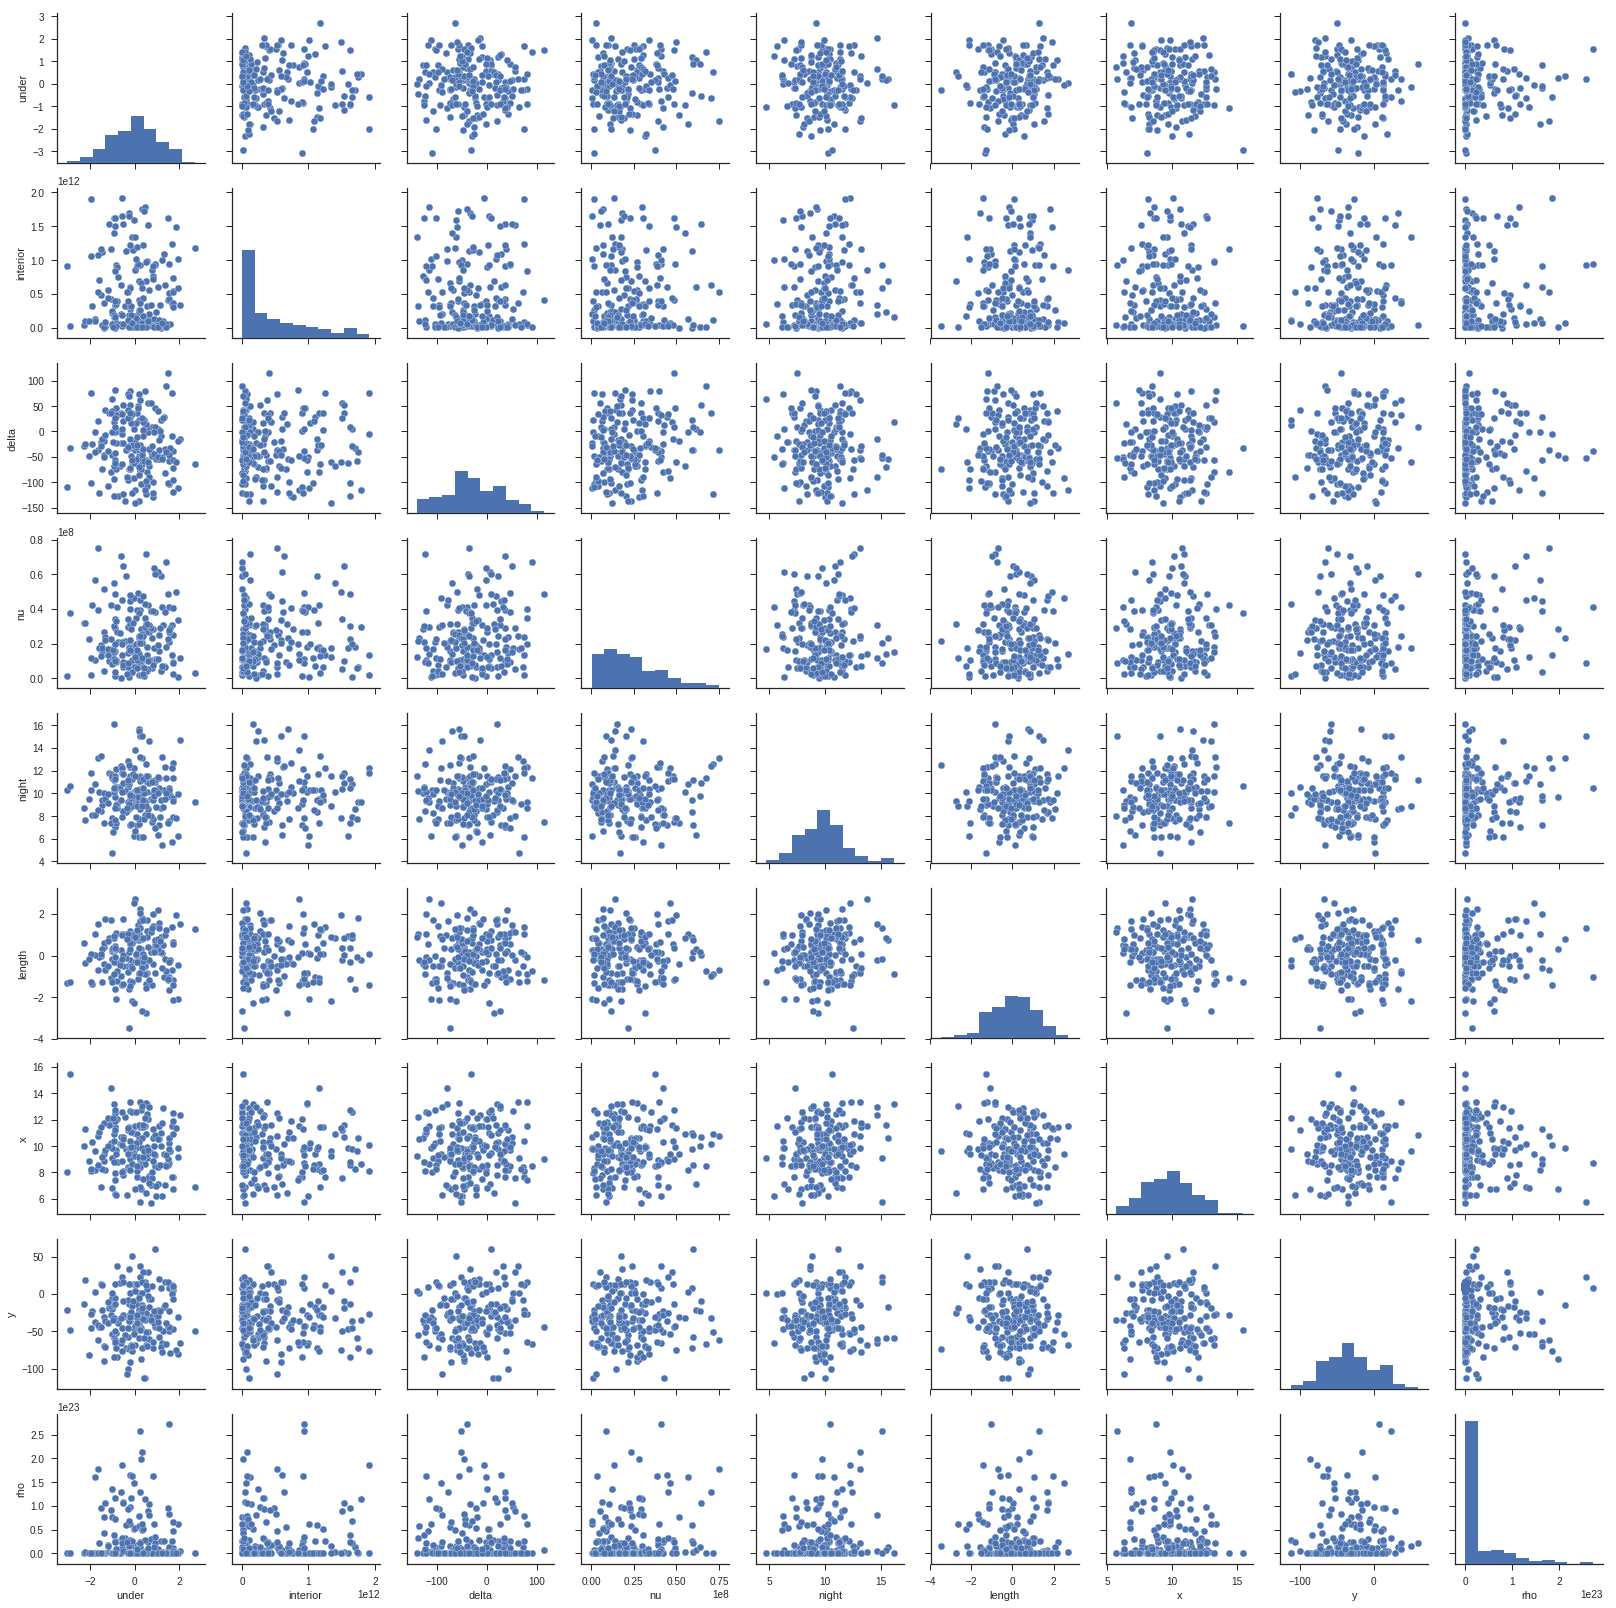

In [22]:
# these columns "Auto correlate" - 'under', 'interior', 'delta', 'nu', 'night', 'length', 'x', 'y', 'rho'

# polynomial - 'slice', 'height'

# linear - 'arrow'

seaborn.pairplot(data[['under', 'interior', 'delta', 'nu', 'night', 'length', 'x', 'y', 'rho']].sample(200))




(-200, 200)

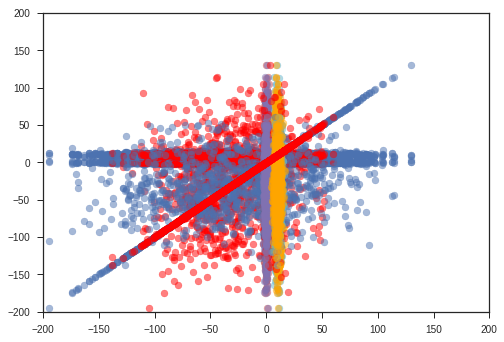

In [38]:
ticks = ['x','o','v','+','-','l','1']
colors = ['r','g','b','r','c','m','orange','red','yellow']

plt.scatter(data['delta'],data['night'],alpha=0.4)
plt.scatter(data['length'],data['y'],alpha=0.4,color="yellow")
plt.scatter(data['length'],data['x'],alpha=1.0,color="green")

interesting_columns = ['under', 'interior', 'delta', 'nu', 'night', 'length', 'x', 'y', 'rho']

for i,col in enumerate(interesting_columns):
    for j,row in enumerate(interesting_columns):
        plt.scatter(data[row],data[col],color=colors[j],alpha=0.5)

plt.xlim(-200,200)
plt.ylim(-200,200)

# these columns "Auto correlate" - 'under', 'interior', 'delta', 'nu', 'night', 'length', 'x', 'y', 'rho'

# polynomial - 'slice', 'height'

# linear - 'arrow'

[[1.         0.99999786]
 [0.99999786 1.        ]]


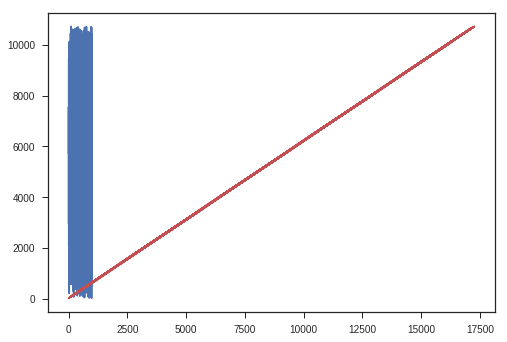

In [18]:
plt.plot(np.arange(0,len(data['arrow'])), data['arrow'])
np.corrcoef(data['arrow'], np.arange(0,len(data['arrow'])))
plt.plot(data['wind'], data['arrow'], 'r')
print(np.corrcoef(data['arrow'], data['wind']))

[[1. 0.]
 [0. 1.]]


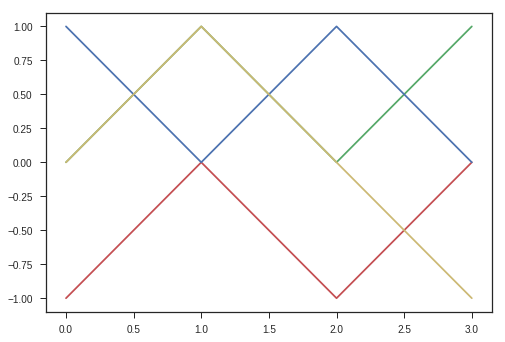

In [15]:
cor_x = [0, 1, 0, 1]
cor_X = [-1, 0, -1, 0]
cor_y = [1, 0, 1, 0]
cor_Y = [0, 1, 0, -1]
plt.plot(range(4), cor_x, 'g')
plt.plot(range(4), cor_X, 'r')
plt.plot(range(4), cor_y, 'b')
plt.plot(range(4), cor_Y, 'y')
np.corrcoef(cor_x, cor_y)
print(np.corrcoef(cor_x, cor_Y))

In [13]:
import pandas as pd

print(data.columns)
x = np.array([[x,y] for x in data.columns for y in data.columns])
print(x.shape)
cors = pd.DataFrame([[x, y, np.corrcoef(data[x],data[y])] for x in data.columns for y in data.columns])
print(cors.head(2))
#print(cors)
#for cor in cors[1:]:
#    print(cor)
#    print(cor.ix[:0])
allcors = np.array([x for x in cors])
allcors_ix = np.argsort(allcors)[::-1]
#print(allcors)
#print(allcors_ix)
#print(cors)
#print(allcors[allcors_ix])
print(cors.ix[allcors_ix].head(50))
print(cors.ix[allcors_ix].tail(50))

Index(['arrow', 'under', 'interior', 'theta', 'amb', 'slice', 'delta', 'pi',
       'height', 'nu', 'night', 'dataset', 'length', 'twi', 'x', 'wind', 'y',
       'rho', 'alpha'],
      dtype='object')
(361, 2)
       0      1                                                  2
0  arrow  arrow                           [[1.0, 1.0], [1.0, 1.0]]
1  arrow  under  [[1.0, 0.008854684205478825], [0.0088546842054...
       0         1                                                  2
2  arrow  interior  [[1.0, -0.032311946785148614], [-0.03231194678...
1  arrow     under  [[1.0, 0.008854684205478825], [0.0088546842054...
0  arrow     arrow                           [[1.0, 1.0], [1.0, 1.0]]
       0         1                                                  2
2  arrow  interior  [[1.0, -0.032311946785148614], [-0.03231194678...
1  arrow     under  [[1.0, 0.008854684205478825], [0.0088546842054...
0  arrow     arrow                           [[1.0, 1.0], [1.0, 1.0]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# Visualize your result

Draw a single plot containing multiple datasets in different colors and styles. You can use subplots, different colors and symbols, and one or more legends to create an attractive plot. Summarize any knowledge you have gained about the dataset verbally.

In [1]:
plt.plot(data['wind'],data['arrow'],'o')
plt.show()
plt.plot(data['slice'],data['height'],'o')
plt.show()
plt.plot(data['dataset'],data['interior'],'o')
plt.show()
plt.scatter(data['length'],data['under'],color='r',alpha=0.3)
plt.scatter(data['night'],data['x'],color='g',alpha=0.3)
plt.scatter(data['y'],data['delta'],color='b',alpha=0.3)
plt.show()
plt.plot(data['theta'],data['nu'],'o')
plt.show()
plt.plot(data['pi'],data['rho'],'o')
plt.show()

NameError: ignored

# Thinking about your assignment

1. What is this assignment asking for? What programming elements are required, like graphing, dataset manipulation, and intuition should I be looking for? What python functions will be required? Why is visualization important?
2. Make a list of the first four steps I need to take in order to explore and solve this assignment:
3. What do I want to have accomplished when I have finished this assignment?


# Googling about your assignment

```
python bar chart
python scatter plot
python plotting dataset
matplotlib legend
matplotlib subplot
beautiful python graphs
```

# Stretch goal

So, you found all of the relationships in the toy dataset! Try doing the same thing with the titanic set and okcupid. Use categorical data as color indices into your graph! You can plot all three ticket classes aboard the titanic using the same graph to gain even deeper intuitions.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def randomlinear(numberofpoints=10,slope=1/2,noise=1.0):
  x = np.arange(0,numberofpoints)
  noisex = np.random.random(numberofpoints)*noise
  noisey = np.random.random(numberofpoints)*noise
  y = ((x+noisex*0.5)*slope)+noisey
  permutation = np.random.permutation(numberofpoints)
  return pd.DataFrame([x[permutation],y[permutation]]).T

def randompolynomial(numberofpoints=10,degree=2,noise=3.0):
  x = np.arange(0,numberofpoints)
  noisex = np.random.random(numberofpoints)*noise
  noisey = np.random.random(numberofpoints)*noise
  y = ((x+noisex)**degree)+noisey
  permutation = np.random.permutation(numberofpoints)
  return pd.DataFrame([x[permutation],y[permutation]]).T

def randomnormal(numberofpoints=10,mean=[0,0],cov=[[1,0],[0,1]]):
  return pd.DataFrame(np.random.multivariate_normal(mean, cov, numberofpoints))

size = 1000

x1 = randomlinear(size)
x2 = randompolynomial(size)
x3 = randompolynomial(size, degree=3, noise=4000)
x4 = randomnormal(size)
x5 = randomnormal(size, [10,10], cov=[[4,1],[1,3]])
x6 = randomnormal(size, [-30,-30], cov=[[1100,9],[100,3000]])
x7 = randompolynomial(size, degree=2, noise=1000)
x8 = randompolynomial(size, degree=6, noise=4000)
x9 = pd.DataFrame(np.random.random(size)*1000)
x10 = pd.DataFrame(np.random.random(size)*500)
x11 = pd.DataFrame(np.random.random(size)*1500)

z = pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11], axis=1)

z.columns = ['wind','arrow','slice','height','dataset','interior','length','under','night','x','y','delta','theta','nu','pi','rho','alpha','amb','twi']

print(z.columns)
print(z.head())

y = z.sample(axis=1,frac=1.0)

print(y.columns)

y.to_csv('important.csv')


Index(['wind', 'arrow', 'slice', 'height', 'dataset', 'interior', 'length',
       'under', 'night', 'x', 'y', 'delta', 'theta', 'nu', 'pi', 'rho',
       'alpha', 'amb', 'twi'],
      dtype='object')
    wind       arrow  slice         height  dataset      interior    length  \
0  658.0  329.674439  447.0  200971.657509    813.0  2.126763e+10  0.679877   
1  179.0   89.837808  960.0  924834.562960    678.0  3.708921e+10  1.120696   
2  661.0  330.994746  165.0   27239.822829    379.0  7.065796e+10  1.527500   
3  370.0  185.651097  343.0  119707.155685    448.0  1.813974e+10  1.032893   
4  610.0  306.120768  187.0   35698.138455    684.0  2.605074e+10 -0.389372   

      under      night          x          y       delta  theta            nu  \
0  1.218662   8.517356   9.077116   4.439447 -134.688731  606.0  4.168396e+05   
1  0.050476  11.613190  15.086599  -4.180678  108.326366  527.0  3.947401e+05   
2  0.215318   7.341440  12.050141 -38.464177   41.427699  178.0  1.354260e+06   


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: covariance is not positive-semidefinite.
